# Exploratory Data Analysis dan Visualisasi Waktu Pengiriman Makanan untuk Optimalisasi Layanan Food Delivery

## Tahap 1: Pemahaman Masalah & Problem Statement

In [ ]:
# Tahap 1: Pemahaman Masalah
# Problem Statement:
# Layanan food delivery sering mengalami keterlambatan pengiriman.
# Perlu diketahui faktor-faktor apa saja yang mempengaruhi waktu pengiriman,
# serta bagaimana pola dan tren pengiriman makanan agar operasional bisa dioptimalkan.
# Tujuan: melakukan exploratory data analysis (EDA) dan menyiapkan visualisasi (dashboard).

Interpretasi:
- Proyek ini berfokus pada **identifikasi faktor kunci keterlambatan pengiriman** agar perusahaan dapat melakukan perbaikan operasional.

## Tahap 2: Data Preprocessing

### Data

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/Food_Delivery_Times.csv")
print("Data: ", df.head())

Data:     Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  


### Struktur Data

In [ ]:
# Cek struktur data
print("Ukuran dataset:", df.shape)
print("Kolom dataset:", df.columns)
print("Tipe data dataset:", df.dtypes)

Ukuran dataset: (1000, 9)
Kolom dataset: Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')
Tipe data dataset: Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object


### Missing Value

In [ ]:
# Cek missing values
print("Missing Values per Kolom:\n", df.isnull().sum())

Missing Values per Kolom:
 Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [ ]:
# Isi missing values numerik dengan median
df.fillna(df.median(numeric_only=True), inplace=True)

### Duplikat

In [ ]:
# Drop duplikat
print("Jumlah duplikat sebelum drop:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah duplikat setelah drop:", df.duplicated().sum())

Jumlah duplikat sebelum drop: 0
Jumlah duplikat setelah drop: 0


In [ ]:
# Pastikan data final sudah bersih
print("Ukuran dataset setelah preprocessing:", df.shape)

Ukuran dataset setelah preprocessing: (1000, 9)


Interpretasi:
- Data sudah siap dianalisis tanpa bias karena missing value/duplikasi. Outlier pada waktu pengiriman tetap dipertahankan untuk dianalisis (karena relevan sebagai indikasi keterlambatan ekstrem).

## Tahap 3: Eksplorasi Data (EDA) Part 1

### Analisis Distribusi dan Pola Awal

#### Distribusi Delivery Time

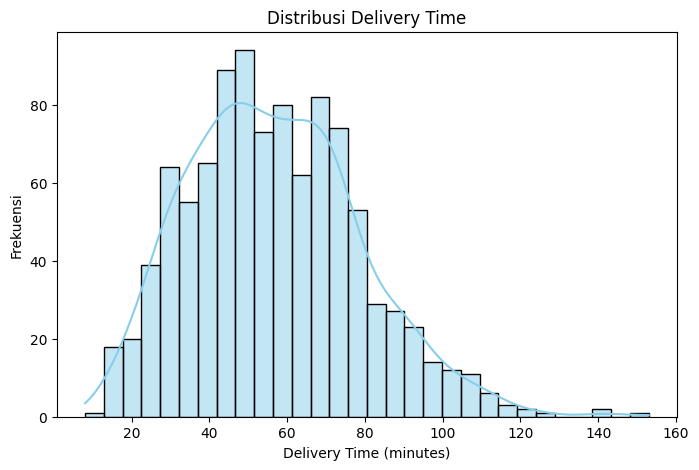

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi Delivery Time
plt.figure(figsize=(8,5))
sns.histplot(df["Delivery_Time_min"], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frekuensi")
plt.show()

### Delivery Time berdasarkan Traffic Level

/tmp/ipython-input-192359193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Traffic_Level", y="Delivery_Time_min", data=df, palette="Set2")


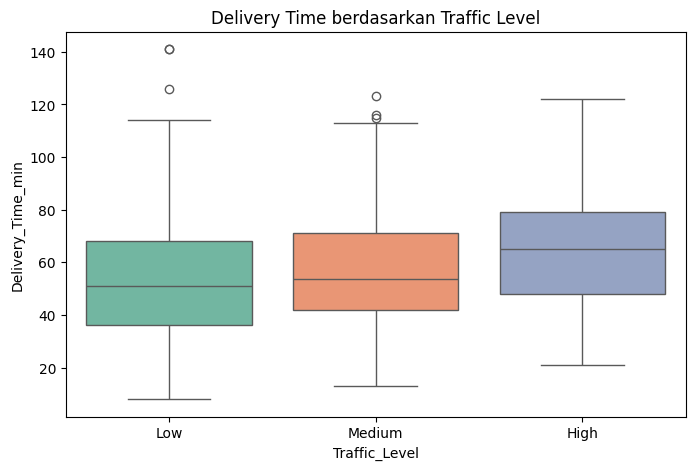

In [ ]:
# Boxplot: Traffic vs Delivery Time
plt.figure(figsize=(8,5))
sns.boxplot(x="Traffic_Level", y="Delivery_Time_min", data=df, palette="Set2")
plt.title("Delivery Time berdasarkan Traffic Level")
plt.show()

### Delivery Time berdasarkan Weather

/tmp/ipython-input-4090069688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Weather", y="Delivery_Time_min", data=df, palette="Set3")


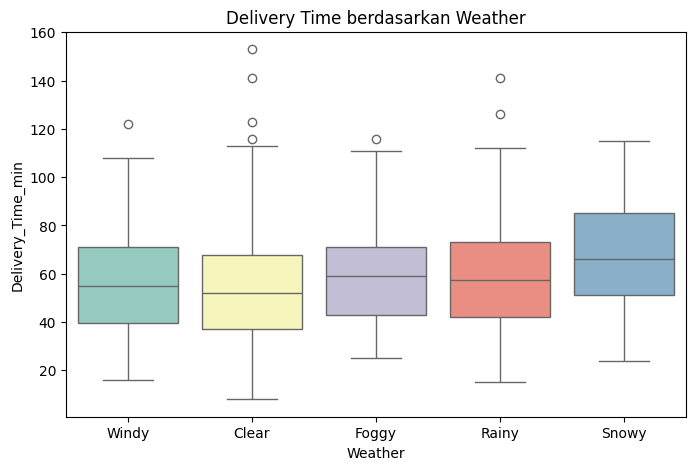

In [ ]:
# Boxplot: Weather vs Delivery Time
plt.figure(figsize=(8,5))
sns.boxplot(x="Weather", y="Delivery_Time_min", data=df, palette="Set3")
plt.title("Delivery Time berdasarkan Weather")
plt.show()

Interpretasi:
- Distribusi Delivery Time
  - Mayoritas waktu pengiriman berada pada 40 – 70 menit.
  - Ada ekor panjang ke kanan menunjukkan outlier (pengiriman sangat lama, >100 menit). Artinya sebagian besar pesanan normal, namun ada kasus keterlambatan signifikan yang perlu dianalisis.
- Delivery Time berdasarkan Traffic Level
  - Traffic Low, artinya median sekitar 50 menit.
  - Traffic Medium, artinya median lebih tinggi, variasi lebih besar.
  - Traffic High, artinya median meningkat lagi (60+ menit) dengan banyak outlier.
  - Kesimpulan: traffic padat berbanding lurus dengan keterlambatan pengiriman.
- Delivery Time berdasarkan Weather
  - Clear (cuaca cerah), artinya median paling rendah.
  - Windy, Foggy, Rainy artinya median naik ke 55–65 menit.
  - Snowy artinya paling tinggi, dengan distribusi waktu lebih lebar.
  - Kesimpulan: cuaca buruk (terutama snowy/rainy) memperlambat pengiriman.

## Tahap 3: Eksplorasi Data (EDA) Part 2


### Analisis Korelasi dan Hubungan Antar Variabel

#### Korelasi Antar Variabel Numerik

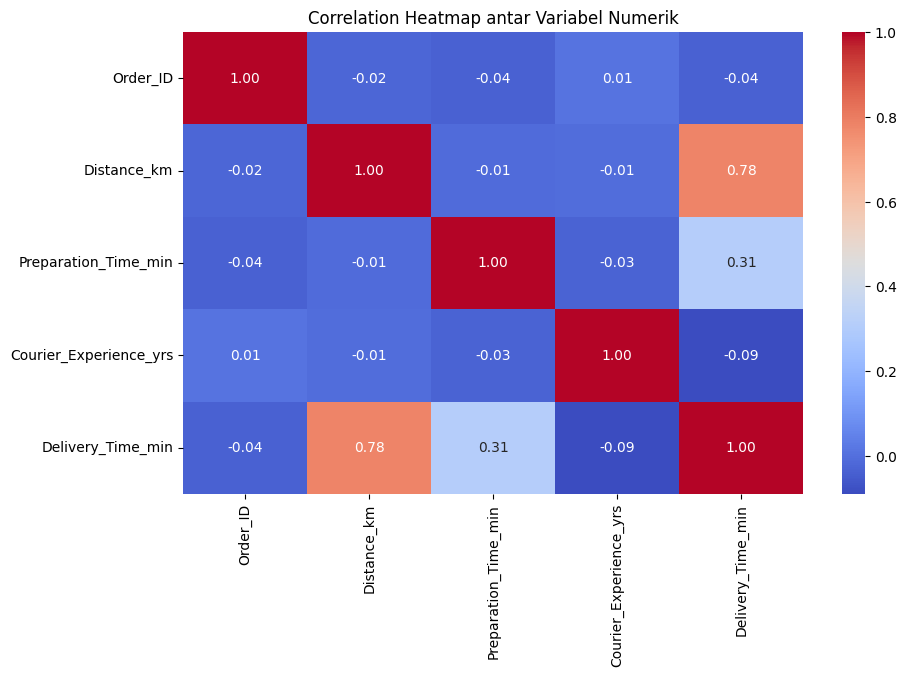

In [ ]:
# Korelasi antar variabel numerik
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap antar Variabel Numerik")
plt.show()

### Hubungan Distance dengan Delivery Time terhadap Warna Traffic

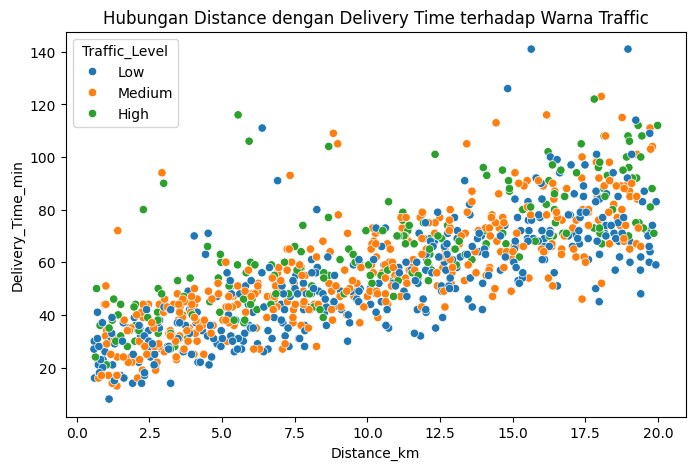

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Distance_km", y="Delivery_Time_min", hue="Traffic_Level", data=df)
plt.title("Hubungan Distance dengan Delivery Time terhadap Warna Traffic")
plt.show()

#### Hubungan Prep Time vs Delivery Time terhadap Weather

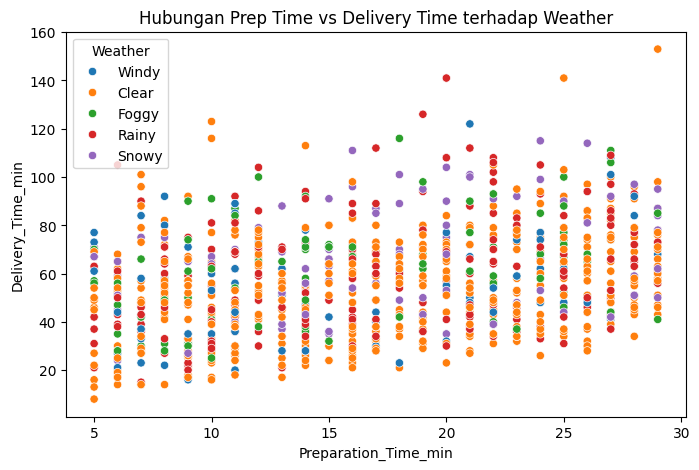

In [ ]:
# Scatterplot: Prep Time vs Delivery Time
plt.figure(figsize=(8,5))
sns.scatterplot(x="Preparation_Time_min", y="Delivery_Time_min", hue="Weather", data=df)
plt.title("Hubungan Prep Time vs Delivery Time terhadap Weather")
plt.show()

Interpretasi:
- Korelasi antar Variabel Numerik
  - Distance_km - Delivery_Time_min korelasi positif kuat (0.78).
  - Preparation_Time_min - Delivery_Time_min korelasi sedang (0.31).
  - Courier_Experience_yrs - Delivery_Time_min korelasi negatif lemah (-0.09).
  - Kesimpulan: jarak tempuh adalah faktor paling berpengaruh, disusul oleh waktu persiapan restoran.
- Hubungan Distance dengan Delivery Time terhadap Traffic Level
  - Terlihat pola linear positif artinya semakin jauh jarak, semakin lama pengiriman.
  - Warna menunjukkan traffic: pada jarak sama, traffic High menghasilkan waktu antar lebih lama dibanding traffic Low/Medium.
  - Kesimpulan: Distance dan Traffic saling memperkuat keterlambatan.
- Hubungan Preparation Time dengan Delivery Time terhadap Weather
  - Ada tren positif artinya semakin lama prep time restoran, semakin lama total delivery.
  - Warna menunjukkan weather artinya saat Rainy/Snowy, delivery time lebih tinggi pada prep time yang sama.
  - Kesimpulan: prep time restoran + cuaca buruk memperlambat proses pengiriman.

## Insight
- Faktor terbesar keterlambatan: Traffic & Distance.
- Faktor tambahan signifikan: Preparation Time restoran.
- Faktor pendukung: Weather (cuaca buruk memperparah keterlambatan).
- Faktor kecil: Courier Experience tidak terlalu signifikan.

## Saran dan Rekomendasi
- Manajemen Traffic
  - Gunakan algoritma routing pintar agar kurir dapat memilih jalur tercepat.
  - Terapkan zona pengantaran atau biaya tambahan saat jam sibuk (dynamic pricing).
  - Prediksi lonjakan permintaan berdasarkan pola traffic harian dan musim liburan.
- Optimasi Jarak (Distance)
  - Rekomendasikan restoran terdekat secara otomatis kepada pelanggan.
  - Bangun cloud kitchen / dapur satelit di wilayah dengan demand tinggi untuk mengurangi jarak tempuh.
  - Lakukan clustering area pelanggan agar restoran partner bisa lebih strategis memilih lokasi.
- Waktu Persiapan Restoran
  - Buat SLA (Service Level Agreement) maksimal waktu persiapan (misalnya 15 menit).
  - Restoran dengan persiapan cepat diberi label khusus (“Quick Prep”) agar lebih diminati.
  - Gunakan sistem alert/notifikasi jika resto melebihi standar waktu.
- Kondisi Cuaca
  - Tambahkan estimasi waktu tambahan pada aplikasi saat hujan / badai.
  - Berikan insentif tambahan kepada kurir saat cuaca ekstrem agar tetap mau menerima order.
  - Sediakan peralatan pengiriman standar (raincoat, thermal bag) agar kualitas makanan tetap terjaga.
- Transparansi & Pengalaman Pelanggan
  - Tampilkan ETA real-time yang dinamis (mempertimbangkan traffic, cuaca, dan persiapan restoran).
  - Kirim notifikasi otomatis saat ada keterlambatan.
  - Berikan opsi kompensasi kecil (voucher / diskon) jika keterlambatan signifikan, untuk menjaga loyalitas.